### Email Spam Detection

We’ve all been the recipient of spam emails before. Spam mail, or junk mail, is a type of email
that is sent to a massive number of users at one time, frequently containing cryptic
messages, scams, or most dangerously, phishing content.



In this Project, use Python to build an email spam detector. Then, use machine learning to
train the spam detector to recognize and classify emails into spam and non-spam. Let’s get
started!


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
#check encoding of file

import chardet

# Open the file in binary mode and read a chunk of data
with open('/Users/BBK/Files/Job Hunt/Oasis Infobyte/Datasets/Email Spam Detection.csv', 'rb') as f:
    raw_data = f.read(100000)  # Read the first 100,000 bytes or adjust as needed

# Detect the encoding of the raw data
result = chardet.detect(raw_data)
encoding = result['encoding']

print("Detected Encoding:", encoding)


Detected Encoding: Windows-1252


In [3]:
#read file
df = pd.read_csv('/Users/BBK/Files/Job Hunt/Oasis Infobyte/Datasets/Email Spam Detection.csv',
                 encoding='Windows-1252')

## Data Wrangling

In [4]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [6]:
#Drop the Unammed columns as it contains only very few values
df.drop(['Unnamed: 2', 'Unnamed: 3','Unnamed: 4'], axis=1, inplace=True)

In [7]:
#change the names of the columns
df['Target']=df['v1']
df['Feature']=df['v2']

In [8]:
df.drop(['v1','v2'], axis=1, inplace= True)

In [9]:
df.head()

,Target,Feature
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [10]:
df['Target']=df['Target'].replace({
    'ham':0,
    'spam':1
})

## Exploratory Data Analysis (EDA)

In [11]:
#check the balance of target variable v1
df['Target'].value_counts()

0    4825
1     747
Name: Target, dtype: int64

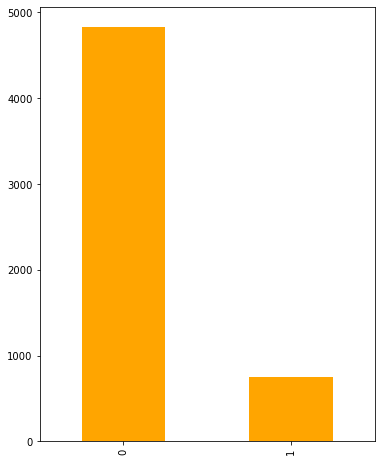

In [12]:
#visualize the data
plt.figure(figsize=(6,8))
df['Target'].value_counts().plot(kind='bar', color='orange')
plt.show()

### Data Augmentation

In [13]:
df_0=df[df['Target']==0]
df_1=df[df['Target']==1]

In [15]:
#import resample library from sklearn
from sklearn.utils import resample
df_1_rs=resample(df_1, n_samples=4600, replace=True)

In [18]:
df=pd.concat([df_0,df_1_rs])

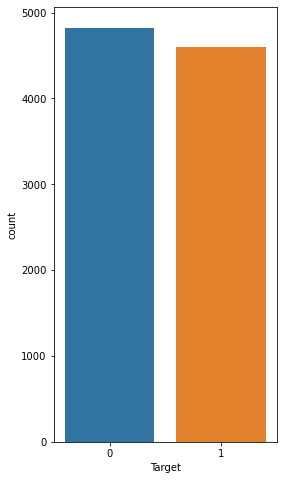

In [40]:
plt.figure(figsize=(4,8))
sns.countplot(x=df["Target"])
plt.show()

## Data Pre-Processing

In [22]:
X=df['Feature']
Y=df['Target']

In [23]:
#cross validation
from sklearn.model_selection import train_test_split

In [24]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=.2, random_state=7)

In [25]:
#import vectirizer from sklearn
from sklearn.feature_extraction.text import CountVectorizer

In [26]:
vectorizer= CountVectorizer()

In [27]:
x_train=vectorizer.fit_transform(x_train)

In [28]:
x_test=vectorizer.transform(x_test)

## Model Creation
    *We have a number of options but we will choose Naive Bayes classifier, which is based on probability theory, as our model beacause it works best with spam detection.

In [29]:
#import Multinomial Naive Bayes
from sklearn.naive_bayes import MultinomialNB

In [30]:
model_mnb=MultinomialNB()

In [31]:
#train the model
model_mnb.fit(x_train,y_train)

MultinomialNB()

In [32]:
#predict the test dataset
y_pred=model_mnb.predict(x_test)

### Model Evaluation

In [33]:
#import evalutaion metrics
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [34]:
#accuracy score
score=accuracy_score(y_test,y_pred)
score

0.9846153846153847

In [35]:
#confusion matrix
confusion_matrix(y_test,y_pred)

array([[981,   9],
       [ 20, 875]])

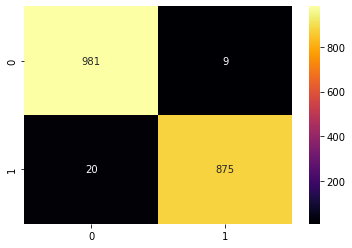

In [36]:
sns.heatmap(confusion_matrix(y_test,y_pred), fmt='0.0f', annot=True, cmap='inferno')
plt.show()

In [37]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       990
           1       0.99      0.98      0.98       895

    accuracy                           0.98      1885
   macro avg       0.98      0.98      0.98      1885
weighted avg       0.98      0.98      0.98      1885

